In [3]:
import pandas as pd

In [4]:
data = pd.read_csv("mumbai house dataset.csv")

In [5]:
data.head()

,flat_type,flat_price,location1,buildupArea_sqft,age_of_property,furnishing,bedrooms,bathrooms,balcony,parking
0,1 BHK Flat,0.45,Parel,240,new construction,Unfurnished,1,1,0,no
1,1 BHK Flat,0.20,Naigaon East,280,recent construction,Semi Furnished,1,1,0,no
2,1 BHK Flat,0.39,Wadala,300,new construction,Semi Furnished,1,1,0,yes
3,1 BHK Flat,0.57,Byculla,300,recent construction,Unfurnished,1,2,0,yes
4,1 BHK Flat,0.92,Mulund West,307,new construction,Unfurnished,1,1,0,yes


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7483 entries, 0 to 7482
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   flat_type         7483 non-null   object 
 1   flat_price        7483 non-null   float64
 2   location1         7483 non-null   object 
 3   buildupArea_sqft  7483 non-null   int64  
 4   age_of_property   7483 non-null   object 
 5   furnishing        7483 non-null   object 
 6   bedrooms          7483 non-null   int64  
 7   bathrooms         7483 non-null   int64  
 8   balcony           7483 non-null   int64  
 9   parking           7483 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 584.7+ KB


In [7]:
# Calculate descriptive statistics
stats = data["flat_price"].describe().reset_index()

# Round the price values to 2 decimal places
stats["flat_price"] = round(stats["flat_price"], 2)

# Display the result
print(stats)


   index  flat_price
0  count     7483.00
1   mean        2.72
2    std        2.58
3    min        0.08
4    25%        1.05
5    50%        1.90
6    75%        3.40
7    max       18.00


In [8]:
# Check missing values in each column
print(data.isnull().sum())


flat_type           0
flat_price          0
location1           0
buildupArea_sqft    0
age_of_property     0
furnishing          0
bedrooms            0
bathrooms           0
balcony             0
parking             0
dtype: int64


In [9]:
data.duplicated().sum()

110

In [10]:
data.isna().sum().sum() 

0

In [11]:
data = data.drop_duplicates() # removing duplicates


In [12]:
data = data.drop_duplicates().reset_index(drop=True) #adjusting row index


In [13]:
print(stats)

   index  flat_price
0  count     7483.00
1   mean        2.72
2    std        2.58
3    min        0.08
4    25%        1.05
5    50%        1.90
6    75%        3.40
7    max       18.00


In [14]:
import matplotlib.pyplot as plt

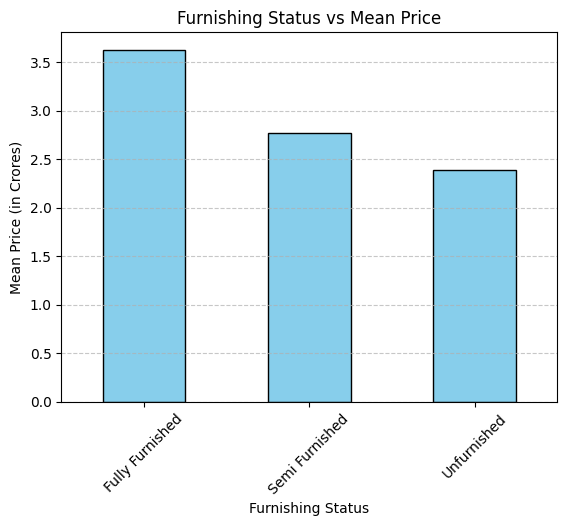

In [15]:


data.groupby("furnishing")["flat_price"].mean().sort_values(ascending=False).plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Furnishing Status vs Mean Price")
plt.ylabel("Mean Price (in Crores)")  # Assuming Price is in Crores
plt.xlabel("Furnishing Status")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


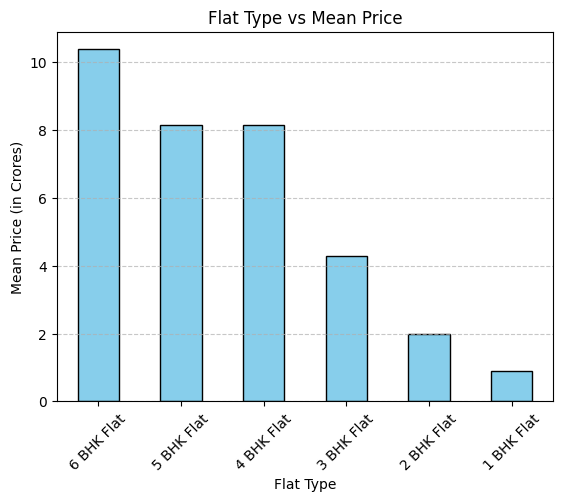

In [16]:
data.groupby("flat_type")["flat_price"].mean().sort_values(ascending=False).plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Flat Type vs Mean Price")
plt.ylabel("Mean Price (in Crores)")  # Assuming Price is in Crores
plt.xlabel("Flat Type")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [17]:
data

,flat_type,flat_price,location1,buildupArea_sqft,age_of_property,furnishing,bedrooms,bathrooms,balcony,parking
0,1 BHK Flat,0.45,Parel,240,new construction,Unfurnished,1,1,0,no
1,1 BHK Flat,0.20,Naigaon East,280,recent construction,Semi Furnished,1,1,0,no
2,1 BHK Flat,0.39,Wadala,300,new construction,Semi Furnished,1,1,0,yes
3,1 BHK Flat,0.57,Byculla,300,recent construction,Unfurnished,1,2,0,yes
4,1 BHK Flat,0.92,Mulund West,307,new construction,Unfurnished,1,1,0,yes
...,...,...,...,...,...,...,...,...,...,...
7368,6 BHK Flat,9.00,Mulund West,4640,new construction,Unfurnished,6,4,0,yes
7369,4 BHK Flat,8.50,Powai,4690,recent construction,Semi Furnished,4,4,0,yes
7370,5 BHK Flat,7.00,Mulund West,4720,new construction,Unfurnished,5,4,2,yes
7371,5 BHK Flat,17.25,Powai,4925,recent construction,Unfurnished,5,3,0,yes


In [ ]:
data_filtered = data[(data['builduparea_sqft'] >= 300) & (data['builduparea_sqft'] <= 4500)]

# Create bins for builduparea_sqft with a gap of 200
bins = range(300, 4700, 200)  # 4700 to include 4500 in the last bin
labels = [f"{i}-{i+200}" for i in range(300, 4500, 200)]

# Group the builduparea_sqft into bins
data_filtered['area_bins'] = pd.cut(data_filtered['buildupArea_sqft'], bins=bins, labels=labels, include_lowest=True)

# Calculate the mean flat price for each bin and sort by mean price
mean_price_by_area = data_filtered.groupby('area_bins')['flat_price'].mean().sort_values(ascending=False)

# Plot the bar graph
mean_price_by_area.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Build-Up Area vs Mean Flat Price")
plt.ylabel("Mean Price (in Crores)")  # Assuming price is in crores
plt.xlabel("Build-Up Area (sqft)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

KeyError: 'builduparea_sqft'

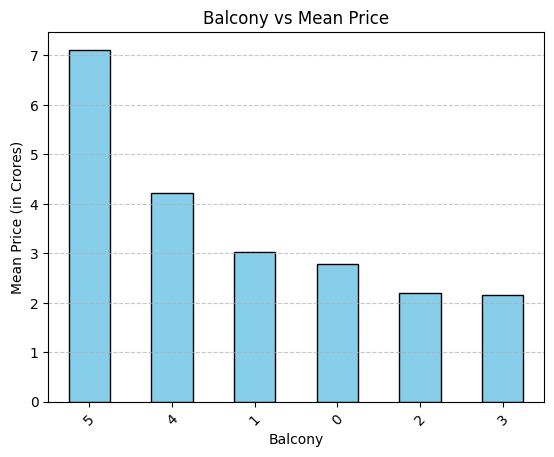

In [19]:
data.groupby("balcony")["flat_price"].mean().sort_values(ascending=False).plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Balcony vs Mean Price")
plt.ylabel("Mean Price (in Crores)")  # Assuming Price is in Crores
plt.xlabel("Balcony")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

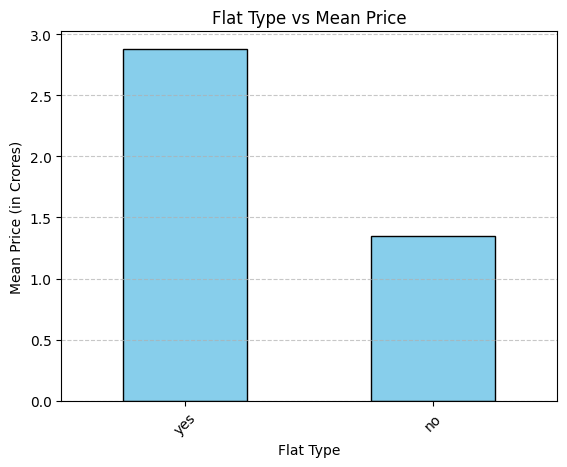

In [20]:
data.groupby("parking")["flat_price"].mean().sort_values(ascending=False).plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Flat Type vs Mean Price")
plt.ylabel("Mean Price (in Crores)")  # Assuming Price is in Crores
plt.xlabel("Flat Type")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

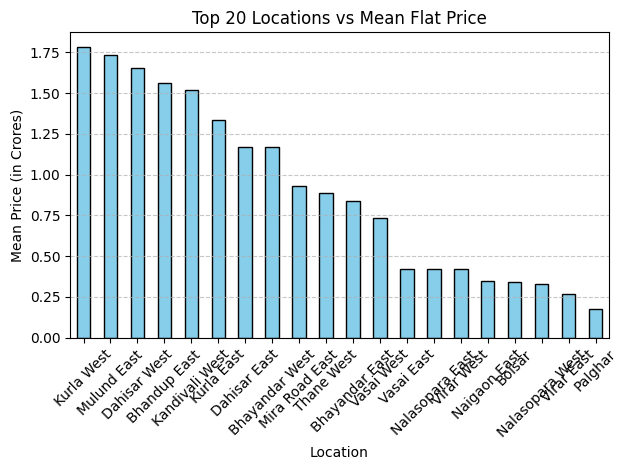

In [21]:


# Assuming 'data' is your DataFrame with 'location1' and 'flat_price' columns
# Group by location1, calculate mean flat_price, sort, and select top 20
top_20_locations = data.groupby("location1")["flat_price"].mean().sort_values(ascending=False).tail(20)

# Plot the bar graph for the top 20 locations
top_20_locations.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Top 20 Locations vs Mean Flat Price")
plt.ylabel("Mean Price (in Crores)")  # Assuming price is in crores
plt.xlabel("Location")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

C:\Users\sanke\AppData\Local\Temp\ipykernel_9396\742829342.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x="furnishing", y="flat_price", palette="pastel", edgecolor="black")


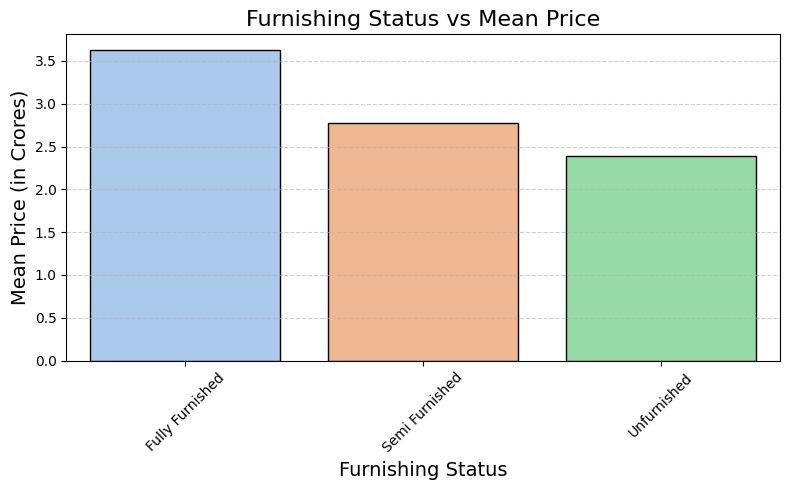

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Clean column names
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

# Step 2: Prepare grouped data
grouped_data = data.groupby("furnishing")["flat_price"].mean().sort_values(ascending=False).reset_index()

# Step 3: Seaborn barplot
plt.figure(figsize=(8,5))
sns.barplot(data=grouped_data, x="furnishing", y="flat_price", palette="pastel", edgecolor="black")

plt.title("Furnishing Status vs Mean Price", fontsize=16)
plt.xlabel("Furnishing Status", fontsize=14)
plt.ylabel("Mean Price (in Crores)", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [23]:
data.columns

Index(['flat_type', 'flat_price', 'location1', 'builduparea_sqft',
       'age_of_property', 'furnishing', 'bedrooms', 'bathrooms', 'balcony',
       'parking'],
      dtype='object')

In [24]:
X=data[['flat_type', 'location1','builduparea_sqft','furnishing','parking']]
Y=data["flat_price"]

In [25]:
X

,flat_type,location1,builduparea_sqft,furnishing,parking
0,1 BHK Flat,Parel,240,Unfurnished,no
1,1 BHK Flat,Naigaon East,280,Semi Furnished,no
2,1 BHK Flat,Wadala,300,Semi Furnished,yes
3,1 BHK Flat,Byculla,300,Unfurnished,yes
4,1 BHK Flat,Mulund West,307,Unfurnished,yes
...,...,...,...,...,...
7368,6 BHK Flat,Mulund West,4640,Unfurnished,yes
7369,4 BHK Flat,Powai,4690,Semi Furnished,yes
7370,5 BHK Flat,Mulund West,4720,Unfurnished,yes
7371,5 BHK Flat,Powai,4925,Unfurnished,yes


In [26]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Select features and target
X=data[['flat_type', 'location1','builduparea_sqft','furnishing','parking']]
Y = data['flat_price']

# Identify categorical and numerical columns
categorical_cols = ['flat_type', 'location1', 'furnishing','parking']
numerical_cols = ['builduparea_sqft']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore',sparse_output=False), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ]
)

# Create pipeline: Preprocessing + Model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Hyperparameter tuning
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [10, 20, None],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, Y_train)

# Best model
best_rf_model = grid_search.best_estimator_

# Predict and Evaluate
print("Training Score:", best_rf_model.score(X_train, Y_train))
print("Testing Score:", best_rf_model.score(X_test, Y_test))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Training Score: 0.954935932190357
Testing Score: 0.8518715988795891


In [27]:
grid_search.fit(X_train, Y_train)
grid_search    # <<< this triggers the pretty display!


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['flat_type',
                                                                          'location1',
                                                                          'furnishing',
                                                                          'parking']),
                                                                        ('num',
                                                                         'passthrough',
                                                                         ['builduparea_sqft'])])),
                                       ('model', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'model__max_depth': [10, 20, None],
                         'model__min_samples_leaf': [1, 2],
                         'model__min_samples_split': [2, 5],
                         'model__n_estimators': [100, 200]},
             verbose=1)

In [28]:
data.head()

,flat_type,flat_price,location1,builduparea_sqft,age_of_property,furnishing,bedrooms,bathrooms,balcony,parking
0,1 BHK Flat,0.45,Parel,240,new construction,Unfurnished,1,1,0,no
1,1 BHK Flat,0.20,Naigaon East,280,recent construction,Semi Furnished,1,1,0,no
2,1 BHK Flat,0.39,Wadala,300,new construction,Semi Furnished,1,1,0,yes
3,1 BHK Flat,0.57,Byculla,300,recent construction,Unfurnished,1,2,0,yes
4,1 BHK Flat,0.92,Mulund West,307,new construction,Unfurnished,1,1,0,yes


In [29]:
# Stage 1: Base model based ONLY on location

import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
import joblib

# Load data
data = pd.read_csv("mumbai house dataset.csv")

# Create location_mean_price feature
location_mean_price = data.groupby('location1')['flat_price'].mean()
data['location_mean_price'] = data['location1'].map(location_mean_price)

# Features and Target
X1 = data[['location1']]
Y1 = data['flat_price']

# Train-Test split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

# Train Stage 1 model
model_stage1 = CatBoostRegressor(
    iterations=500,
    depth=6,
    learning_rate=0.1,
    loss_function='RMSE',
    verbose=100
)

model_stage1.fit(X1_train, Y1_train, cat_features=['location1'])

# Save Stage 1 model
joblib.dump(model_stage1, "catboost_stage1_location_model.pkl")


0:	learn: 2.4931997	total: 204ms	remaining: 1m 41s
100:	learn: 1.9497256	total: 3.75s	remaining: 14.8s
200:	learn: 1.9318975	total: 7.3s	remaining: 10.9s
300:	learn: 1.9229200	total: 10.7s	remaining: 7.11s
400:	learn: 1.9175150	total: 14.1s	remaining: 3.48s
499:	learn: 1.9136596	total: 17.5s	remaining: 0us


['catboost_stage1_location_model.pkl']

In [30]:
# Predict Stage 1 output
Y1_train_pred = model_stage1.predict(X1_train)
Y1_test_pred = model_stage1.predict(X1_test)

# Calculate Residual (correction needed)
residual_train = Y1_train - Y1_train_pred
residual_test = Y1_test - Y1_test_pred

# Stage 2 input features (exclude location)
X2 = data[['buildupArea_sqft', 'furnishing', 'parking']]

X2_train = X2.loc[X1_train.index]
X2_test = X2.loc[X1_test.index]

# Train Stage 2 model
model_stage2 = CatBoostRegressor(
    iterations=700,
    depth=8,
    learning_rate=0.05,
    loss_function='RMSE',
    verbose=100
)

model_stage2.fit(X2_train, residual_train, cat_features=['furnishing', 'parking'])

# Save Stage 2 model
joblib.dump(model_stage2, "catboost_stage2_correction_model.pkl")


0:	learn: 1.8306527	total: 40.7ms	remaining: 28.4s
100:	learn: 1.1743287	total: 4.66s	remaining: 27.6s
200:	learn: 1.1593268	total: 8.82s	remaining: 21.9s
300:	learn: 1.1453094	total: 13.6s	remaining: 18s
400:	learn: 1.1329453	total: 19.1s	remaining: 14.2s
500:	learn: 1.1219704	total: 24.4s	remaining: 9.68s
600:	learn: 1.1095208	total: 29.5s	remaining: 4.86s
699:	learn: 1.1008608	total: 35s	remaining: 0us


['catboost_stage2_correction_model.pkl']

In [37]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Stage 1 predictions
Y1_train_pred = model_stage1.predict(X1_train)
Y1_test_pred = model_stage1.predict(X1_test)

# Stage 2 predictions (corrections)
correction_train = model_stage2.predict(X2_train)
correction_test = model_stage2.predict(X2_test)

# Final predictions = Stage 1 + Stage 2
Y_train_final = Y1_train_pred + correction_train
Y_test_final = Y1_test_pred + correction_test

# Metrics
def print_metrics(true, pred, label=""):
    print(f"\n📊 {label} Metrics:")
    print(f"R² Score: {r2_score(true, pred):.4f}")
    print(f"RMSE    : {np.sqrt(mean_squared_error(true, pred)):.4f}")
    print(f"MAE     : {mean_absolute_error(true, pred):.4f}")

# Show results
print_metrics(Y1_train, Y_train_final, "Training")
print_metrics(Y1_test, Y_test_final, "Testing")



📊 Training Metrics:
R² Score: 0.8016
RMSE    : 1.1539
MAE     : 0.8073

📊 Testing Metrics:
R² Score: 0.7858
RMSE    : 1.1768
MAE     : 0.8232


In [ ]:
from catboost import CatBoostRegressor, Pool
import matplotlib.pyplot as plt

# Assume these are already defined
# X_train_stage2, y_train_stage2, X_test_stage2, y_test_stage2

# Train the Stage 2 model
model_stage2 = CatBoostRegressor(verbose=0)
model_stage2.fit(X2_train, X2_train)

# Get feature importance scores
importances = model_stage2.get_feature_importance()
feature_names = X2_train.columns

# Combine into a DataFrame for easy viewing
import pandas as pd
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance Score': importances
}).sort_values(by='Importance Score', ascending=False)

print(feat_importance_df)

# Optional: Plot top 10 features
plt.figure(figsize=(10,6))
plt.barh(feat_importance_df['Feature'][:10][::-1], feat_importance_df['Importance Score'][:10][::-1])
plt.xlabel('Importance Score')
plt.title('Top 10 Feature Importances (Stage 2)')
plt.tight_layout()
plt.show()


NameError: name 'X_train_stage2' is not defined

In [31]:
data.head()


,flat_type,flat_price,location1,buildupArea_sqft,age_of_property,furnishing,bedrooms,bathrooms,balcony,parking,location_mean_price
0,1 BHK Flat,0.45,Parel,240,new construction,Unfurnished,1,1,0,no,4.931316
1,1 BHK Flat,0.20,Naigaon East,280,recent construction,Semi Furnished,1,1,0,no,0.350207
2,1 BHK Flat,0.39,Wadala,300,new construction,Semi Furnished,1,1,0,yes,4.621569
3,1 BHK Flat,0.57,Byculla,300,recent construction,Unfurnished,1,2,0,yes,5.223077
4,1 BHK Flat,0.92,Mulund West,307,new construction,Unfurnished,1,1,0,yes,2.486772


In [33]:
feature_importance_stage2 = model_stage2.get_feature_importance(prettified=True)
print("🛠️ Feature Importance for Stage 2 (Correction Model):")
print(feature_importance_stage2)



🛠️ Feature Importance for Stage 2 (Correction Model):
         Feature Id  Importances
0  buildupArea_sqft    86.827823
1        furnishing    11.214526
2           parking     1.957651


In [34]:
feature_importance_stage1 = model_stage1.get_feature_importance(prettified=True)
print("📍 Feature Importance for Stage 1 (Location Model):")
print(feature_importance_stage1)



📍 Feature Importance for Stage 1 (Location Model):
  Feature Id  Importances
0  location1        100.0


In [ ]:
catboost_model


In [ ]:
import joblib

# Save the model to a file
joblib.dump(catboost_model, "catboost_model.pkl")


['catboost_model.pkl']

In [35]:
import pandas as pd

# Step 1: Load your full dataset
df = pd.read_csv("mumbai house dataset.csv")  # <-- replace with your actual dataset file name

# Optional: check if the 'location1' column exists
print(df.columns)

# Extract unique locations
unique_locations = df['location1'].dropna().unique()

# Convert to DataFrame
locations_df = pd.DataFrame(unique_locations, columns=['location'])

# Save to CSV
locations_df.to_csv("locations.csv", index=False)

print("locations.csv created successfully!")



Index(['flat_type', 'flat_price', 'location1', 'buildupArea_sqft',
       'age_of_property', 'furnishing', 'bedrooms', 'bathrooms', 'balcony',
       'parking'],
      dtype='object')
locations.csv created successfully!
